In [ ]:
!nvidia-smi

Fri Aug 27 07:51:35 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    75W / 149W |   2269MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 2. Building and training neural network using TensorFlow 2.x

#### Use TensorFlow 2.x

In [ ]:
import tensorflow as tf

tf.__version__

'2.6.0'

### Preprocess data, build, predict

* Build, compile and train machine learning (ML) models using TensorFlow.
* Preprocess data to get it ready for use in a model.
* Use models to predict results.
* Build sequential models with multiple layers.


In [ ]:
from tensorflow.keras import datasets
import tensorflow_datasets as tfds

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

#### Preprocess data

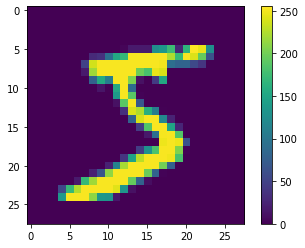

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
img = X_train[0]
tf.reduce_max(img), tf.reduce_min(img)

(<tf.Tensor: shape=(), dtype=uint8, numpy=255>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=0>)

In [ ]:
label = y_train[0]
label

5

##### Normalize the data


In [ ]:
X_train, X_test = X_train/255., X_test/255.

tf.reduce_max(X_train), tf.reduce_min(X_train)

(<tf.Tensor: shape=(), dtype=float64, numpy=1.0>,
 <tf.Tensor: shape=(), dtype=float64, numpy=0.0>)

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
y_train.shape, y_test.shape

((60000,), (10000,))

#### Build the model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Create a model
model_0 = tf.keras.Sequential([
  layers.Flatten(),
  layers.Dense(100, activation="relu"),
  layers.Dense(10, activation="softmax")
])
# Compile the model
model_0.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
# Fit the model
model_0_history = model_0.fit(x=X_train, 
                              y=y_train,
                              validation_data=(X_test, y_test),
                              epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2672 - accuracy: 0.9240 - val_loss: 0.1448 - val_accuracy: 0.9554
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1184 - accuracy: 0.9654 - val_loss: 0.1179 - val_accuracy: 0.9631
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0829 - accuracy: 0.9750 - val_loss: 0.0821 - val_accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0629 - accuracy: 0.9808 - val_loss: 0.0799 - val_accuracy: 0.9760
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0501 - accuracy: 0.9849 - val_loss: 0.0854 - val_accuracy: 0.9725
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0406 - accuracy: 0.9872 - val_loss: 0.0757 - val_accuracy: 0.9769
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0329 - accuracy: 0.9898 - val_loss: 0.0779 - val_accuracy:

In [ ]:
model_0.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0761 - accuracy: 0.9793


[0.07612026482820511, 0.9793000221252441]

#### Plot the history and evaluate the model

In [ ]:
from sklearn.metrics import accuracy_score

model_0_pred_prob = model_0.predict(X_test)
model_0_pred = tf.argmax(model_0_pred_prob, axis=1)

model_0_accuracy = accuracy_score(y_true=y_test, y_pred=model_0_pred)
model_0_accuracy

0.9793

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

model_0_precision, model_0_recall, model_0_f1, _ = precision_recall_fscore_support(y_true=y_test,
                                                                                y_pred=model_0_pred,
                                                                                average="weighted")
model_0_precision, model_0_recall, model_0_f1

(0.979319533176659, 0.9793, 0.9792944002446339)

In [ ]:
model_0_results = {
    "accuracy": model_0_accuracy,
    "precision": model_0_precision,
    "recall": model_0_precision,
    "f1": model_0_f1
}

model_0_results

{'accuracy': 0.9793,
 'f1': 0.9792944002446339,
 'precision': 0.979319533176659,
 'recall': 0.979319533176659}

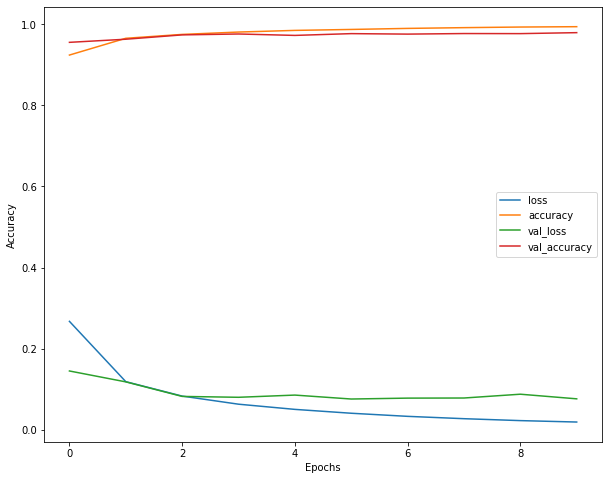

In [ ]:
import pandas as pd

# plt.figure()
pd.DataFrame(model_0_history.history).plot(figsize=(10,8))
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### Regression problem

In [ ]:
import numpy as np

X = tf.constant(np.arange(0, 100))
X

<tf.Tensor: shape=(100,), dtype=int64, numpy=
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])>

In [ ]:
y = tf.constant(np.arange(0, 100)+10)
y

<tf.Tensor: shape=(100,), dtype=int64, numpy=
array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109])>

In [ ]:
split_size = int(0.8 * len(X))
X_train = X[:split_size]
y_train = y[:split_size]

X_test = X[split_size:]
y_test = y[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(80, 20, 80, 20)

In [ ]:
from tensorflow.keras import layers
# Create a model
model_1 = tf.keras.Sequential([
  layers.Dense(100),
  layers.Dense(10),
  layers.Dense(1)
])
# Compile the model
model_1.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mse"]
)
# Fit the model
model_1_history = model_1.fit(X_train,
                              y_train,
                              validation_data=(X_test, y_test),
                              epochs=5)

Epoch 1/5
3/3 [==============================] - 0s 55ms/step - loss: 42.2303 - mse: 2137.3950 - val_loss: 73.5147 - val_mse: 5421.1855
Epoch 2/5
3/3 [==============================] - 0s 10ms/step - loss: 36.5655 - mse: 1588.9636 - val_loss: 59.8589 - val_mse: 3593.4492
Epoch 3/5
3/3 [==============================] - 0s 10ms/step - loss: 30.1282 - mse: 1042.0718 - val_loss: 46.2305 - val_mse: 2142.7500
Epoch 4/5
3/3 [==============================] - 0s 10ms/step - loss: 24.2274 - mse: 659.8851 - val_loss: 32.2626 - val_mse: 1042.9667
Epoch 5/5
3/3 [==============================] - 0s 13ms/step - loss: 17.8485 - mse: 341.8727 - val_loss: 18.0302 - val_mse: 325.3709


In [ ]:
model_1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 12ms/step - loss: 18.0302 - mse: 325.3709


[18.0301570892334, 325.3708801269531]

In [ ]:
model_1_pred = model_1.predict(X_test)
y_pred = model_1_pred
y_pred

array([[72.848366],
       [73.755905],
       [74.66342 ],
       [75.570946],
       [76.47846 ],
       [77.38599 ],
       [78.29351 ],
       [79.20104 ],
       [80.10856 ],
       [81.01608 ],
       [81.92361 ],
       [82.83113 ],
       [83.738655],
       [84.64617 ],
       [85.5537  ],
       [86.46122 ],
       [87.368744],
       [88.27627 ],
       [89.183784],
       [90.09131 ]], dtype=float32)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_label=y_test,
                     predictions=y_pred):
  """
  Plot training data,test data and compares the predictions to ground truth 
  """
  plt.figure(figsize=(10,7))
  # plot data training in blue
  plt.scatter(train_data, train_label, c="b", label="Training")
  # plot data testing in green
  plt.scatter(test_data, test_label, c="g", label="Testing")
  # plt predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")

  plt.legend()

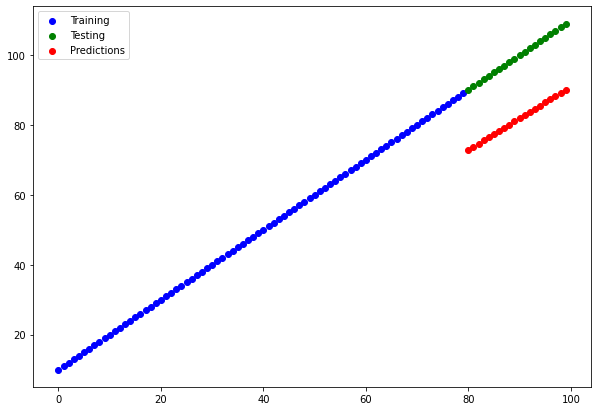

In [ ]:
plot_predictions(predictions=model_1_pred)

### Classification Problems

#### Binary Classification

In [ ]:
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000
# create circles
X, y = make_circles(n_samples=n_samples,
                    shuffle=True,
                    noise=0.03,
                    random_state=42)


In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
import pandas as pd

df = pd.DataFrame({"X1":X[:,0],
                  "X2":X[:,1],
                  "y": y})
df.head()

,X1,X2,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [ ]:
X[:,0].shape, X[:,1].shape

((1000,), (1000,))

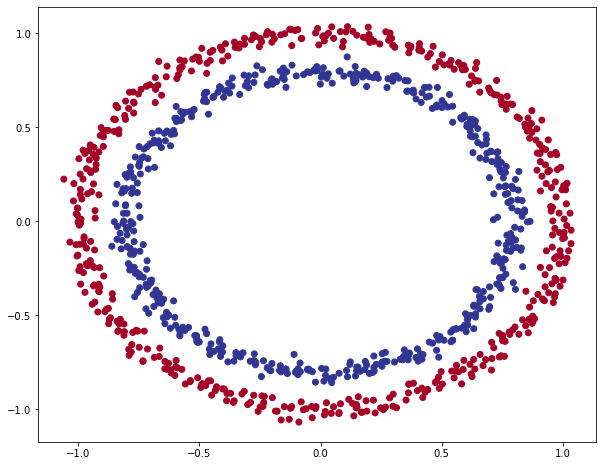

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

##### Split data 

* using array slicing.
* using `sklearn.model_selection.train_test_splits()`

In [ ]:
# (X_train,y_train), (X_test, y_test)

In [ ]:
split_size = int(0.8 * len(X))
X_train = X[:split_size]
y_train = y[:split_size]

X_test = X[split_size:]
y_test = y[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

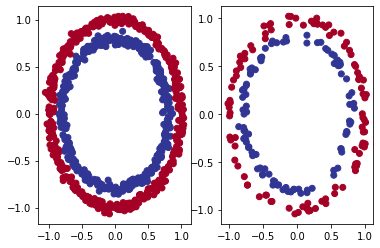

In [ ]:
plt.subplot(1,2, 1)
plt.scatter(X_train[:,0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu)

plt.subplot(1,2 ,2)
plt.scatter(X_test[:,0], X_test[:, 1], c=y_test, cmap=plt.cm.RdYlBu)

In [ ]:
# create model
model_2 = tf.keras.Sequential([
  layers.Dense(100, activation="relu"),
  layers.Dense(100, activation="relu"),
  layers.Dense(1, activation="sigmoid")
])
# compile the model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
# fit the model
model_2_history = model_2.fit(X_train,
                              y_train,
                              validation_data=(X_test, y_test),
                              epochs=10)

Epoch 1/10
25/25 [==============================] - 1s 8ms/step - loss: 0.6904 - accuracy: 0.4988 - val_loss: 0.6867 - val_accuracy: 0.5050
Epoch 2/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6826 - accuracy: 0.4988 - val_loss: 0.6848 - val_accuracy: 0.5050
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6763 - accuracy: 0.5000 - val_loss: 0.6777 - val_accuracy: 0.5400
Epoch 4/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6683 - accuracy: 0.5412 - val_loss: 0.6676 - val_accuracy: 0.5850
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6561 - accuracy: 0.6500 - val_loss: 0.6511 - val_accuracy: 0.5650
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6361 - accuracy: 0.5763 - val_loss: 0.6308 - val_accuracy: 0.7950
Epoch 7/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6095 - accuracy: 0.8263 - val_loss: 0.5907 - val_accuracy: 0.8800
Epoch 8/10
25/25 [==

In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max()+0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max()+0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # Create X value (we're going to predictions on these):
  # ravel() is flatten an array
  # np.c_ is concat array along the second axis
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2d array together

  # make predictions
  y_pred = model.predict(x_in)

  # check for multi-class:
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classificatioon")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0],X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [ ]:
model_2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.9950


[0.4142822027206421, 0.9950000047683716]

doing binary classificatioon


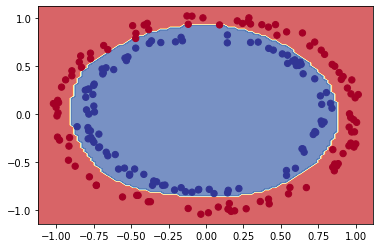

In [ ]:
plot_decision_boundary(model_2, X_test, y_test)

#### Multiclass classification

In [ ]:
# We done it in the previous section

## Image classification

For this problem, we'll using fashion-mnist dataset.

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

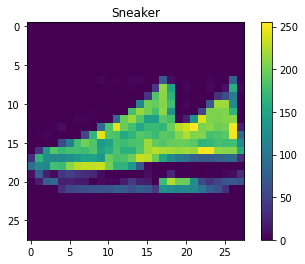

In [ ]:
import random 
random_num = random.randint(0,len(X_train)-1)
img = X_train[random_num]
label = y_train[random_num]
plt.imshow(img)
plt.title(class_names[label])
plt.colorbar()
plt.show()

#### Preprocess data

In [ ]:
len(class_names)

10

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
X_train = X_train/255.
y_train = tf.one_hot(y_train, depth=len(class_names))

X_test = X_test/255.
y_test =tf.one_hot(y_test, depth=len(class_names))

tf.reduce_max(X_train), tf.reduce_min(X_train), y_train[0]

(<tf.Tensor: shape=(), dtype=float64, numpy=1.0>,
 <tf.Tensor: shape=(), dtype=float64, numpy=0.0>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)>)

#### Build and train Conv2D model

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# Create callback
# SAVE_DIR = "save_dir"

def create_checkpoint_callback(model_name):
  return tf.keras.callbacks.ModelCheckpoint(filepath=f"{model_name}/checkpoint.ckpt",
                                                          #  monitor="val_accuracy",
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           save_freq="epoch")

In [ ]:
from tensorflow.keras import layers

# Build a model
inputs = layers.Input(shape=(28, 28,1), name="input_layer")

x = layers.Conv2D(filters=32,
                 kernel_size=3,
                 padding="same",
                  activation="relu")(inputs)
x = layers.Conv2D(filters=32,
                  kernel_size=3,
                  padding="same",
                  activation="relu")(x)
x = layers.MaxPooling2D()(x)

x = layers.Flatten()(x)

x = layers.Dense(100, activation='relu')(x)
x = layers.Dense(10, activation='relu')(x)

outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_3 = tf.keras.Model(inputs, outputs, name="model_3_conv2d")

# Compile the model
model_3.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
# Fit the model
model_3_history = model_3.fit(X_train,
                              y_train,
                              validation_data=(X_test, y_test),
                              epochs=10,
                              callbacks=[create_checkpoint_callback(model_3.name)])

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4460 - accuracy: 0.8440 - val_loss: 0.3137 - val_accuracy: 0.8883
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2563 - accuracy: 0.9075 - val_loss: 0.3217 - val_accuracy: 0.8872
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2060 - accuracy: 0.9246 - val_loss: 0.2448 - val_accuracy: 0.9113
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1683 - accuracy: 0.9379 - val_loss: 0.2434 - val_accuracy: 0.9132
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1402 - accuracy: 0.9490 - val_loss: 0.2400 - val_accuracy: 0.9192
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1162 - accuracy: 0.9565 - val_loss: 0.2527 - val_accuracy: 0.9152
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0933 - accuracy: 0.9652 - val_loss: 0.2571 - val_accuracy:

In [ ]:
# model_3.load_weights(f"{SAVE_DIR}/{model_3.name}")

In [ ]:
model_3.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3387 - accuracy: 0.9179


[0.3386678993701935, 0.917900025844574]

#### Use Another data set

This time we'll using 10 classes from Food101 dataset

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2021-08-27 03:45:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.250.101.128, 142.250.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   152MB/s    in 1.1s    

2021-08-27 03:45:10 (152 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [ ]:
import os

for dir_path, dir_names, file_names in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dir_names)} directories and {len(file_names)} in {dir_path}")

There are 2 directories and 0 in 10_food_classes_10_percent
There are 10 directories and 0 in 10_food_classes_10_percent/train
There are 0 directories and 75 in 10_food_classes_10_percent/train/sushi
There are 0 directories and 75 in 10_food_classes_10_percent/train/fried_rice
There are 0 directories and 75 in 10_food_classes_10_percent/train/pizza
There are 0 directories and 75 in 10_food_classes_10_percent/train/ramen
There are 0 directories and 75 in 10_food_classes_10_percent/train/steak
There are 0 directories and 75 in 10_food_classes_10_percent/train/grilled_salmon
There are 0 directories and 75 in 10_food_classes_10_percent/train/chicken_curry
There are 0 directories and 75 in 10_food_classes_10_percent/train/chicken_wings
There are 0 directories and 75 in 10_food_classes_10_percent/train/ice_cream
There are 0 directories and 75 in 10_food_classes_10_percent/train/hamburger
There are 10 directories and 0 in 10_food_classes_10_percent/test
There are 0 directories and 250 in 10_f

In [ ]:
# Set up train and test dir
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [ ]:
# Let's get the subdirectories
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = sorted([item.name for item in data_dir.glob("*")])
print(class_names)

['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  # Set the target directory
  target_folder = os.path.join(target_dir, target_class)

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)
  # Read in the image 
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape {img.shape}")
  return img

['413789.jpg']
Image shape (512, 384, 3)


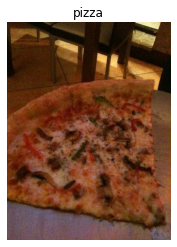

In [ ]:
random_class = random.choice(class_names)
random_img = view_random_image(train_dir, random_class)

#### Use `image_dataset_from_directory`

In [ ]:
IMG_SIZE = (224,224)

In [ ]:
IMG_SIZE + (3,)

(224, 224, 3)

In [ ]:
import tensorflow as tf

train_ds = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                               label_mode="categorical",
                                                               image_size=IMG_SIZE)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              label_mode="categorical",
                                                              image_size=IMG_SIZE)

train_ds, test_ds

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


(<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>,
 <BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>)

In [ ]:
# optimize performance of dataset
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.prefetch(tf.data.AUTOTUNE) 

##### Create and fit Conv2D model

In [ ]:
from tensorflow.keras import layers

# Create model
inputs = layers.Input(shape=(IMG_SIZE+(3,)), name="input_layer")

x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=10,
                  kernel_size=3,
                  activation="relu")(x)
x = layers.Conv2D(filters=10,
                  kernel_size=3,
                  activation="relu")(x)
x = layers.MaxPool2D()(x)

x = layers.Flatten()(x)

outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_4 = tf.keras.Model(inputs, outputs, name="model_4_Conv2D")

# Compile the model
model_4.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
model_4_history = model_4.fit(train_ds,
                              validation_data=test_ds,
                              epochs=5,
                              callbacks=[create_checkpoint_callback(model_4.name)])

Epoch 1/5
24/24 [==============================] - 6s 240ms/step - loss: 7.6281 - accuracy: 0.0987 - val_loss: 2.3389 - val_accuracy: 0.1176
Epoch 2/5
24/24 [==============================] - 6s 235ms/step - loss: 2.2859 - accuracy: 0.1653 - val_loss: 2.2848 - val_accuracy: 0.1652
Epoch 3/5
24/24 [==============================] - 6s 239ms/step - loss: 2.1992 - accuracy: 0.2280 - val_loss: 2.2323 - val_accuracy: 0.1600
Epoch 4/5
24/24 [==============================] - 6s 233ms/step - loss: 1.9227 - accuracy: 0.3680 - val_loss: 2.3264 - val_accuracy: 0.1684
Epoch 5/5
24/24 [==============================] - 6s 233ms/step - loss: 1.5135 - accuracy: 0.5413 - val_loss: 2.4075 - val_accuracy: 0.1904


In [ ]:
# evaluate the model
model_4.evaluate(test_ds)

79/79 [==============================] - 5s 53ms/step - loss: 2.4075 - accuracy: 0.1904


[2.40750789642334, 0.19040000438690186]

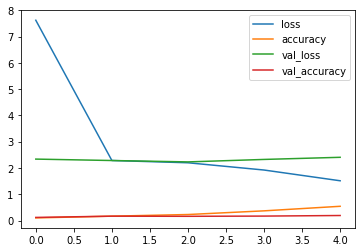

In [ ]:
import pandas as pd

pd.DataFrame(model_4_history.history).plot()

##### Use `ImageDataGenerator`

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed 
tf.random.set_seed(42)

# Prepare dataset
train_datagen = ImageDataGenerator(rescale=1./255,
                                rotation_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_ds = train_datagen.flow_from_directory(train_dir,
                                             target_size=IMG_SIZE,
                                             seed=42,
                                             shuffle=False)

test_ds = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             seed=42,
                                             shuffle=False)

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
# optimize performance dataset
# train_ds = tf.data.Dataset.from_generator(train_ds)
# test_ds = test_ds.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
from tensorflow.keras import layers

# Create model
inputs = layers.Input(shape=(IMG_SIZE+(3,)), name="input_layer")

x = layers.Conv2D(filters=10,
                  kernel_size=3,
                  activation="relu")(inputs)
x = layers.Conv2D(filters=10,
                  kernel_size=3,
                  activation="relu")(x)
x = layers.MaxPool2D()(x)

x = layers.Conv2D(filters=10,
                  kernel_size=3,
                  activation="relu")(x)
x = layers.Conv2D(filters=10,
                  kernel_size=3,
                  activation="relu")(x)
x = layers.MaxPool2D()(x)

x = layers.Flatten()(x)

outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv2D_data_aug")

# Compile the model
model_5.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
model_5_history = model_5.fit(train_ds,
                              validation_data=test_ds,
                              epochs=5,
                              callbacks=[create_checkpoint_callback(model_5.name)])

Epoch 1/5
24/24 [==============================] - 21s 857ms/step - loss: 2.3800 - accuracy: 0.0320 - val_loss: 2.3027 - val_accuracy: 0.0996
Epoch 2/5
24/24 [==============================] - 20s 843ms/step - loss: 2.3029 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/5
24/24 [==============================] - 20s 843ms/step - loss: 2.3033 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.0996
Epoch 4/5
24/24 [==============================] - 20s 846ms/step - loss: 2.3034 - accuracy: 0.0960 - val_loss: 2.3026 - val_accuracy: 0.0992
Epoch 5/5
24/24 [==============================] - 20s 841ms/step - loss: 2.3034 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000


In [ ]:
# evaluate the model
# model_5.load_weights(f"{SAVE_DIR}/{model_5.name}")
model_5.evaluate(test_ds)

79/79 [==============================] - 10s 132ms/step - loss: 2.3026 - accuracy: 0.1000


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

In [ ]:
files_test = ["03-hamburger.jpeg", "03-pizza-dad.jpeg", "03-steak.jpeg", "03-sushi.jpeg"]

In [ ]:
# Create a function to import and preprocess that image to be able to be used with our model
def load_and_prep_image(file_name, image_shape=224):
  """
  Reads an image from file name, turns it into a tensor and reshapes it into (img_shape, image_shape, color_chanels)
  """
  # Read an image 
  img = tf.io.read_file(file_name)
  # Decode the read file into tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=(image_shape, image_shape))
  # Rescale the image (normalize)
  img = img/255

  return img
def predict(model, class_names, file_name):
  img = load_and_prep_image(file_name)
  predict = model.predict(tf.expand_dims(img, axis=0))
  if len(predict[0])>1:
    predicted_class = class_names[tf.argmax(predict[0])]
  else:
    predicted_class = class_names[int(tf.round(predict[0]))]
  # print(predict, int(tf.round(predict)))
  plt.figure(figsize=(8,8))
  plt.imshow(img)
  plt.title(f"Predicted: {predicted_class}")
  plt.axis(False)
  plt.show()

In [ ]:
# predict(model_7, class_names, files_test[2])

#### Transfer learning

using EfficientNetB0-V2

In [ ]:
train_dir, test_dir

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

print(train_dir, test_dir)
train_ds = image_dataset_from_directory(train_dir,
                                        label_mode="categorical",
                                        image_size=IMG_SIZE)
test_ds = image_dataset_from_directory(test_dir,
                                       label_mode="categorical",
                                       image_size=IMG_SIZE)

train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.prefetch(tf.data.AUTOTUNE)

# train_ds, test_ds

In [ ]:
# Set up data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SHAPE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 5

# Specify the train and the test directories
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

print("Training image:")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                              target_size=IMG_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")
print("Testing image:")
test_data_10_percent = test_datagen.flow_from_directory(test_dir,
                                            target_size=IMG_SHAPE,
                                            batch_size=BATCH_SIZE,
                                            class_mode="categorical")

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

efficientnetb0_v2_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"
# efficientnetb0_v1_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"
feature_extracter_layer = hub.KerasLayer(efficientnetb0_v2_url,
                                         trainable=False,
                                         
                                         name="feature_extractor_layer")

In [ ]:
len(class_names)

In [ ]:
model_6_v2 = tf.keras.Sequential([
      feature_extracter_layer,
      layers.Dense(len(class_names), activation="softmax", name="output_layer")
])

model_6_v2.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model_6_v2_history = model_6_v2.fit(train_data_10_percent,
                              validation_data=test_data_10_percent,
                              epochs=5,
                              callbacks=[create_checkpoint_callback(model_6_v2.name)])

In [ ]:
model_6_v2.evaluate(test_data_10_percent)

In [ ]:
model_6.evaluate(test_data_10_percent)

In [ ]:
# Create model
inputs = layers.Input(shape=(IMG_SIZE+(3,)), name="input_layer")

x = layers.Rescaling(1./255)(inputs)

x = feature_extracter_layer(x)

outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_7_V2 = tf.keras.Model(inputs, outputs, name="model_7_V2_transfer_learning_feature_extraction")

# Compile the model
model_7_V2.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
model_7_V2_history = model_7_V2.fit(train_ds,
                              validation_data=test_ds,
                              epochs=5,
                              callbacks=[create_checkpoint_callback(model_7_V2.name)])

In [ ]:
model_7_V2.evaluate(test_ds)

In [ ]:
model_7.evaluate(test_ds)

## Natural Languare Processing

#### Binary Classification

In this problem we'll use the `Twitter disaster datasets`

In [ ]:
!wget https://github.com/BaoLocPham/Tensorflow_Deep_Learning/raw/main/Extras/nlp-getting-started.zip

In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("nlp-getting-started.zip")
zip_ref.extractall()
zip_ref.close()

##### Explore the dataset

In [ ]:
import pandas as pd

raw_df = pd.read_csv("train.csv")

raw_df.head()

In [ ]:
raw_df["keyword"].value_counts()

In [ ]:
raw_df["location"].value_counts()

In [ ]:
data_df = raw_df.drop(["id","keyword", "location"], axis=1)
data_df.head()

In [ ]:
data_df["target"].value_counts().plot(kind="barh")

In [ ]:
data_df_shuffled = data_df.sample(frac=1)
data_df_shuffled.head()

##### Split the dataset

In [ ]:
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels = train_test_split(data_df_shuffled["text"].to_numpy(),
                                                                            data_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

len(train_sentences), len(val_sentences), len(train_labels), len(val_labels)

##### Build the text vectorizer and text embedding

In [ ]:
train_sentences.shape

In [ ]:
len_train_sentences = [len(sent.split(" ")) for sent in train_sentences]

len_df = pd.DataFrame({"len":len_train_sentences})
len_df.value_counts().plot(kind="hist")

In [ ]:
plt.hist(len_train_sentences, bins=20)

In [ ]:
# what is the len cover 95% of the training sentences
import numpy as np

np.percentile(len_train_sentences, 95)

In [ ]:
# What is the number of words in the training sentences

vocab = " ".join(train_sentences)
vocab = set(vocab.split(" "))
len(vocab)

In [ ]:
from tensorflow.keras.layers import TextVectorization

MAX_LENGTH = 25
MAX_TOKEN = 10000

text_vectorizer = TextVectorization(max_tokens=MAX_TOKEN,
                                         output_mode="int",
                                         output_sequence_length=MAX_LENGTH)

text_vectorizer.adapt(train_sentences)

In [ ]:
# Create a sample setences and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

In [ ]:
# Choose a random sentence from the training data and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Origin text:\n {random_sentence}\
          \n\nVectorize version:")
text_vectorizer([random_sentence])

In [ ]:
# get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common words
bottom_5_words = words_in_vocab[-5:] # least common words
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"5 most common words: {top_5_words}")
print(f"5 least common words: {bottom_5_words}")

In [ ]:
from tensorflow.keras.layers import Embedding
"""
input_dim = the size of the vocabulary
output_dim = the size of the output embedding vector
input_length = length of the sentence being passed to the embedding layer
"""
text_embedding = Embedding(input_dim=MAX_TOKEN,
                           output_dim=128,
                           input_length=MAX_LENGTH,
                           embeddings_initializer="uniform")

In [ ]:
# Get a random sentence in the training set 
random_sentence = random.choice(train_sentences)
print(f"Original text: \n{random_sentence}\
\n\nEmbedded version:")
# Embed the ramdon sentence (turn it into dense vector of fixed size)
sample_vectorized = text_vectorizer([random_sentence])
sample_embedded = text_embedding(sample_vectorized)
sample_embedded

##### Build and fit a model

###### LSTM

In [ ]:
from tensorflow.keras import layers

# Create model
inputs = layers.Input(shape=(1,), dtype=tf.string, name="input_layer")

x = text_vectorizer(inputs)
x = text_embedding(x)

x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(64)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model_8 = tf.keras.Model(inputs, outputs, name="model_8_LSTM")

# Compile the model
model_8.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
model_8_history = model_8.fit(train_sentences,
                              train_labels,
                              validation_data=(val_sentences, val_labels),
                              epochs=5,
                              callbacks=[create_checkpoint_callback(model_8.name)])

In [ ]:
model_8.evaluate(val_sentences, val_labels)

#### Multiclass Categorization

In this problem, we'll use the data from [News category dataset](https://www.kaggle.com/rmisra/news-category-dataset)

In [ ]:
!wget https://github.com/BaoLocPham/Tensorflow_Deep_Learning/raw/main/Extras/News_Category_Dataset_v2.json.zip

--2021-08-27 03:50:07--  https://github.com/BaoLocPham/Tensorflow_Deep_Learning/raw/main/Extras/News_Category_Dataset_v2.json.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/BaoLocPham/Tensorflow_Deep_Learning/main/Extras/News_Category_Dataset_v2.json.zip [following]
--2021-08-27 03:50:07--  https://raw.githubusercontent.com/BaoLocPham/Tensorflow_Deep_Learning/main/Extras/News_Category_Dataset_v2.json.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26677036 (25M) [application/zip]
Saving to: ‘News_Category_Dataset_v2.json.zip’

News_Category_Datas 100%[===================>]  25.44M   137

In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("News_Category_Dataset_v2.json.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import pandas as pd

raw_df = pd.read_json("News_Category_Dataset_v2.json", lines=True)
# raw_df.to_csv("News_Category_Dataset.csv")
raw_df.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [ ]:
raw_df.drop(["authors", "link", "date"], axis=1, inplace=True)

In [ ]:
class_names = raw_df["category"].unique()
class_names

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST', 'FIFTY', 'ARTS',
       'WELLNESS', 'PARENTING', 'HOME & LIVING', 'STYLE & BEAUTY',
       'DIVORCE', 'WEDDINGS', 'FOOD & DRINK', 'MONEY', 'ENVIRONMENT',
       'CULTURE & ARTS'], dtype=object)

In [ ]:
raw_df["category"] = raw_df["category"].map(lambda x: "WORLDPOST" if x=="THE WORLDPOST" else x)

In [ ]:
raw_df["text"] = raw_df["headline"] + " " + raw_df["short_description"]

In [ ]:
raw_df["text"][0]

'There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV She left her husband. He killed their children. Just another day in America.'

In [ ]:
import regex as re
def clean_text(text):
  text = re.sub(r'[^\w\s]','',text)
  return text

In [ ]:
import random 

random_int = random.randint(0, len(raw_df)-1)
random_text = raw_df["text"][random_int]
print(f"Text:{random_text}\n Removed puntuation: {clean_text(random_text)}")

Text:Confessions of a Blue-Gened Blonde Unlike other people, I can't keep my depression in the closet. For one thing, I need the space for shoes. But more importantly, staying silent perpetuates the stigma that mental health isn't a topic for polite conversation. So might I propose we all stop being so polite?
 Removed puntuation: Confessions of a BlueGened Blonde Unlike other people I cant keep my depression in the closet For one thing I need the space for shoes But more importantly staying silent perpetuates the stigma that mental health isnt a topic for polite conversation So might I propose we all stop being so polite


In [ ]:
raw_df["text"] = raw_df["text"].map(clean_text)
raw_df["text"] = raw_df["text"].str.lower()
raw_df["text"].head()

0    there were 2 mass shootings in texas last week...
1    will smith joins diplo and nicky jam for the 2...
2    hugh grant marries for the first time at age 5...
3    jim carrey blasts castrato adam schiff and dem...
4    julianna margulies uses donald trump poop bags...
Name: text, dtype: object

In [ ]:
# one hot encode labels
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)
label = one_hot_encoder.fit_transform(raw_df["category"].to_numpy().reshape(-1,1))

# raw_df["label"] = label
class_names = np.array(one_hot_encoder.categories_, dtype="str")[0]
class_names 

array(['ARTS', 'ARTS & C', 'BLACK VO', 'BUSINESS', 'COLLEGE', 'COMEDY',
       'CRIME', 'CULTURE ', 'DIVORCE', 'EDUCATIO', 'ENTERTAI', 'ENVIRONM',
       'FIFTY', 'FOOD & D', 'GOOD NEW', 'GREEN', 'HEALTHY ', 'HOME & L',
       'IMPACT', 'LATINO V', 'MEDIA', 'MONEY', 'PARENTIN', 'PARENTS',
       'POLITICS', 'QUEER VO', 'RELIGION', 'SCIENCE', 'SPORTS', 'STYLE',
       'STYLE & ', 'TASTE', 'TECH', 'TRAVEL', 'WEDDINGS', 'WEIRD NE',
       'WELLNESS', 'WOMEN', 'WORLD NE', 'WORLDPOS'], dtype='<U8')

##### Create data for training and validation

In [ ]:
sentences = raw_df["text"]
label = one_hot_encoder.fit_transform(raw_df["category"].to_numpy().reshape(-1,1))

In [ ]:
from sklearn.model_selection import train_test_split

train_sentences, test_sentences, train_labels, test_labels = train_test_split(sentences.to_numpy(),
                                                                              label,
                                                                              test_size=0.2)

len(train_sentences), len(test_sentences), len(train_labels), len(test_labels)

(160682, 40171, 160682, 40171)

In [ ]:
train_labels.shape

(160682, 40)

In [ ]:
train_features = tf.data.Dataset.from_tensor_slices(train_sentences)
train_labels = tf.data.Dataset.from_tensor_slices(train_labels)

train_ds = tf.data.Dataset.zip((train_features, train_labels))

test_features = tf.data.Dataset.from_tensor_slices(test_sentences)
test_labels = tf.data.Dataset.from_tensor_slices(test_labels)

test_ds = tf.data.Dataset.zip((test_features, test_labels))

In [ ]:
train_ds = train_ds.batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
import numpy as np

train_sentences[0], class_names[np.argmax(train_labels[0])]

('katy perry drops new olympics single rise at the perfect moment this is a song thats been brewing inside me for years',
 'ENTERTAI')

##### Build the text vectorizer and text embedding

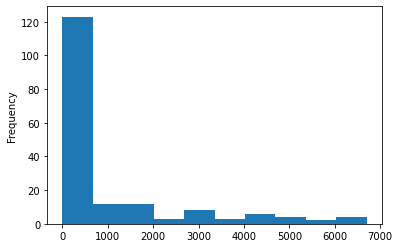

In [ ]:
len_train_sentences = [len(sent.split(" ")) for sent in train_sentences]

len_df = pd.DataFrame({"len":len_train_sentences})
len_df.value_counts().plot(kind="hist")

In [ ]:
# what is the len cover 95% of the training sentences
import numpy as np

np.percentile(len_train_sentences, 95)

56.0

In [ ]:
vocab = " ".join(train_sentences)
vocab = set(vocab.split(" "))
vocab_len = len(vocab)
vocab_len

102744

In [ ]:
from tensorflow.keras.layers import TextVectorization, Embedding

MAX_TOKENS = 105000
MAX_LENGTH = 60

text_vectorizer = TextVectorization(max_tokens=MAX_TOKENS,
                                    output_mode="int",
                                    output_sequence_length=MAX_LENGTH)
text_vectorizer.adapt(train_sentences)

text_embedding = Embedding(input_dim=MAX_TOKENS,
                           output_dim=256,
                           input_length=MAX_LENGTH,
                           embeddings_initializer="uniform")

In [ ]:
# get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common words
bottom_5_words = words_in_vocab[-5:] # least common words
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"5 most common words: {top_5_words}")
print(f"5 least common words: {bottom_5_words}")

Number of words in vocab: 102742
5 most common words: ['', '[UNK]', 'the', 'to', 'a']
5 least common words: ['0010', '001', '0002', '000064', '00']


In [ ]:
# Get a random sentence in the training set 
random_sentence = random.choice(train_sentences)
print(f"Original text: \n{random_sentence}\
\n\nEmbedded version:")
# Embed the ramdon sentence (turn it into dense vector of fixed size)
sample_vectorized = text_vectorizer([random_sentence])
sample_embedded = text_embedding(sample_vectorized)
sample_embedded

Original text: 
prince harry offers a perfect take on vets experiencing ptsd now this is how you talk about mental health and the military

Embedded version:


<tf.Tensor: shape=(1, 60, 256), dtype=float32, numpy=
array([[[-0.02988741, -0.01978387, -0.00210118, ...,  0.03688402,
          0.04099676,  0.04347726],
        [-0.02565848, -0.01342086, -0.03138348, ..., -0.02096807,
         -0.01091192, -0.00520958],
        [ 0.03781096,  0.00968594,  0.04533634, ..., -0.02199518,
         -0.03617049, -0.00086548],
        ...,
        [ 0.02594527,  0.02468164,  0.00922592, ...,  0.01617893,
          0.04119625,  0.01296576],
        [ 0.02594527,  0.02468164,  0.00922592, ...,  0.01617893,
          0.04119625,  0.01296576],
        [ 0.02594527,  0.02468164,  0.00922592, ...,  0.01617893,
          0.04119625,  0.01296576]]], dtype=float32)>

##### Build and Fit the model

###### LSTM

In [ ]:
from tensorflow.keras import layers
# Create the model
inputs = layers.Input(shape=(1,), dtype=tf.string, name="input_layer")

x = text_vectorizer(inputs)
x = text_embedding(x)

x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(64)(x)

outputs = layers.Dense(len(class_names), activation="softmax")(x)

model_9 = tf.keras.Model(inputs, outputs, name="model_8_LSTM_multiclass")

# Compile the model
model_9.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
model_9_history = model_9.fit(train_ds,
                              validation_data=test_ds,
                              validation_steps=int(0.2 * len(test_ds)),
                              epochs=5)

Epoch 1/5
5022/5022 [==============================] - 228s 45ms/step - loss: 2.5274 - accuracy: 0.3407 - val_loss: 1.8650 - val_accuracy: 0.5134
Epoch 2/5
5022/5022 [==============================] - 224s 45ms/step - loss: 1.4981 - accuracy: 0.5962 - val_loss: 1.4178 - val_accuracy: 0.6130
Epoch 3/5
5022/5022 [==============================] - 223s 44ms/step - loss: 1.0140 - accuracy: 0.7152 - val_loss: 1.4825 - val_accuracy: 0.6172
Epoch 4/5
5022/5022 [==============================] - 223s 44ms/step - loss: 0.6855 - accuracy: 0.8052 - val_loss: 1.6933 - val_accuracy: 0.6011
Epoch 5/5
5022/5022 [==============================] - 223s 44ms/step - loss: 0.4590 - accuracy: 0.8694 - val_loss: 1.9582 - val_accuracy: 0.5690


In [ ]:
model_9.evaluate(test_ds)

1256/1256 [==============================] - 17s 13ms/step - loss: 1.8221 - accuracy: 0.5874


[1.8220643997192383, 0.5873640179634094]

#### Text Generation

In this problem, we'll the Shakepeare dataset 🙂

This part we reference to Tensorflow tutorial on generate text.

In [3]:
import tensorflow as tf
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

1130496/1115394 [==============================] - 0s 0us/step


##### Read the data

In [4]:
text = open(path_to_file, "rb").read().decode(encoding="utf8")
# length of text is the number of characters in it
print(f'Length of text: {len(text)} characters')

Length of text: 1115394 characters


In [5]:
# Take a look at the first 250 characters in text
print(text[:250])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



In [6]:
# The unique characters in the file
vocab = sorted(set(text))
print(f'{len(vocab)} unique characters')

65 unique characters


In [7]:
vocab

['\n',
 ' ',
 '!',
 '$',
 '&',
 "'",
 ',',
 '-',
 '.',
 '3',
 ':',
 ';',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

##### Preprocess the text

Because the DL/ML model cannot understand the text, so we need to convert it in to numbers.

The `preprocessing.StringLookup` layer can convert each character into a numeric ID. It just needs the text to be split into tokens first.

In [8]:
example_texts = ['abcdefg', 'xyz']

chars = tf.strings.unicode_split(example_texts, input_encoding='UTF-8')
chars

<tf.RaggedTensor [[b'a', b'b', b'c', b'd', b'e', b'f', b'g'], [b'x', b'y', b'z']]>

In [9]:
from tensorflow.keras import layers
ids_from_chars = layers.StringLookup(vocabulary=vocab,
                                     mask_token=None)

In [10]:
ids = ids_from_chars(chars)
ids

<tf.RaggedTensor [[40, 41, 42, 43, 44, 45, 46], [63, 64, 65]]>

In [11]:
## Revert from number to char
chars_from_ids = layers.StringLookup(vocabulary=ids_from_chars.get_vocabulary(),
                                     invert=True,
                                     mask_token=None)

In [12]:
chars = chars_from_ids(ids)
chars

<tf.RaggedTensor [[b'a', b'b', b'c', b'd', b'e', b'f', b'g'], [b'x', b'y', b'z']]>

You can `tf.strings.reduce_join` to join the characters back into strings.

In [13]:
tf.strings.reduce_join(chars, axis=-1)

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'abcdefg', b'xyz'], dtype=object)>

In [14]:
def text_from_ids(ids):
  return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)

##### Create training example and targets

In [15]:
all_ids = ids_from_chars(tf.strings.unicode_split(text,"UTF-8"))
all_ids

<tf.Tensor: shape=(1115394,), dtype=int64, numpy=array([19, 48, 57, ..., 46,  9,  1])>

In [16]:
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)
ids_dataset

<TensorSliceDataset shapes: (), types: tf.int64>

In [17]:
for id in ids_dataset.take(10):
  print(chars_from_ids(id).numpy().decode("utf-8"))

F
i
r
s
t
 
C
i
t
i


In [18]:
seq_length = 100
# examples_per_epoch = len(text)//seq_length
examples_per_epoch = 100

In [19]:
len(text)

1115394

In [20]:
sequences = ids_dataset.batch(examples_per_epoch+1, drop_remainder=True)

for seq in sequences.take(1):
  print(chars_from_ids(seq))

tf.Tensor(
[b'F' b'i' b'r' b's' b't' b' ' b'C' b'i' b't' b'i' b'z' b'e' b'n' b':'
 b'\n' b'B' b'e' b'f' b'o' b'r' b'e' b' ' b'w' b'e' b' ' b'p' b'r' b'o'
 b'c' b'e' b'e' b'd' b' ' b'a' b'n' b'y' b' ' b'f' b'u' b'r' b't' b'h'
 b'e' b'r' b',' b' ' b'h' b'e' b'a' b'r' b' ' b'm' b'e' b' ' b's' b'p'
 b'e' b'a' b'k' b'.' b'\n' b'\n' b'A' b'l' b'l' b':' b'\n' b'S' b'p' b'e'
 b'a' b'k' b',' b' ' b's' b'p' b'e' b'a' b'k' b'.' b'\n' b'\n' b'F' b'i'
 b'r' b's' b't' b' ' b'C' b'i' b't' b'i' b'z' b'e' b'n' b':' b'\n' b'Y'
 b'o' b'u' b' '], shape=(101,), dtype=string)


In [21]:
for seq in sequences.take(5):
  print(text_from_ids(seq).numpy())

b'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '
b'are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you k'
b"now Caius Marcius is chief enemy to the people.\n\nAll:\nWe know't, we know't.\n\nFirst Citizen:\nLet us ki"
b"ll him, and we'll have corn at our own price.\nIs't a verdict?\n\nAll:\nNo more talking on't; let it be d"
b'one: away, away!\n\nSecond Citizen:\nOne word, good citizens.\n\nFirst Citizen:\nWe are accounted poor citi'


For training you'll need a dataset of `(input, label)` pairs. Where `input` and label are sequences. At each time step the input is the current character and the label is the next character.

Here's a function that takes a sequence as input, duplicates, and shifts it to align the input and label for each timestep:

In [22]:
def split_input_target(sequence):
  input_text = sequence[:-1]
  target_text = sequence[1:]
  return input_text, target_text

In [23]:
sample_sequence = "TensorFlow"

split_input_target(list(sample_sequence))

(['T', 'e', 'n', 's', 'o', 'r', 'F', 'l', 'o'],
 ['e', 'n', 's', 'o', 'r', 'F', 'l', 'o', 'w'])

In [24]:
dataset = sequences.map(split_input_target)

for input_sample, target_sample in dataset.take(1):
  print(f"Input: {text_from_ids(input_sample).numpy()}")
  print(f"Target: {text_from_ids(target_sample).numpy()}")

Input: b'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'
Target: b'irst Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '


###### Create training Batches

In [25]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = (dataset.shuffle(BUFFER_SIZE)
                  .batch(BATCH_SIZE, drop_remainder=True)
                  .prefetch(tf.data.AUTOTUNE))
dataset

<PrefetchDataset shapes: ((64, 100), (64, 100)), types: (tf.int64, tf.int64)>

##### Build the model

In [26]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# Length of the sequence
seq_length = 100

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

In [27]:
from tensorflow.keras import layers
# Create embedding layer
embedding_layer = layers.Embedding(input_dim=vocab_size,
                                   output_dim=embedding_dim,
                                   input_length=seq_length,
                                   embeddings_initializer="uniform")

In [38]:
from tensorflow.keras import layers
inputs = layers.Input(batch_input_shape=[BATCH_SIZE, None], name="input_layer")

x = embedding_layer(inputs)

x = layers.GRU(units=rnn_units,
               return_sequences=True,
               stateful=True)(x)

outputs = layers.Dense(vocab_size)(x)

model_10 = tf.keras.Model(inputs, outputs, name="model_10_text_generate")


In [34]:
model_10 = tf.keras.Sequential([
     tf.keras.layers.Embedding(vocab_size, embedding_dim,
     batch_input_shape=[BATCH_SIZE, None]),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.LSTM(rnn_units,
     return_sequences=True,
     stateful=True,
     recurrent_initializer="glorot_uniform"),
     tf.keras.layers.Dropout(0.2), 
     tf.keras.layers.LSTM(rnn_units,
     return_sequences=True,
     stateful=True,
     recurrent_initializer="glorot_uniform"),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(vocab_size)
 ])

In [39]:
# Compile the model
model_10.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [40]:
# # Directory where the checkpoints will be saved
# checkpoint_dir = './training_checkpoints'
# # Name of the checkpoint files
# checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")
checkpoint_prefix = model_10.name+"/checkpoint.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    monitor="accuracy",
    save_best_only=True,
    save_weights_only=True)

In [ ]:
EPOCHS=20
# Train the model
model_10_history = model_10.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])

Epoch 1/20


In [ ]:
class MyModel(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, rnn_units):
    super().__init__(self)
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(rnn_units,
                                   return_sequences=True,
                                   return_state=True)
    self.dense = tf.keras.layers.Dense(vocab_size)

  def call(self, inputs, states=None, return_state=False, training=False):
    x = inputs
    x = self.embedding(x, training=training)
    if states is None:
      states = self.gru.get_initial_state(x)
    x, states = self.gru(x, initial_state=states, training=training)
    x = self.dense(x, training=training)

    if return_state:
      return x, states
    else:
      return x

In [ ]:
model = MyModel(
    # Be sure the vocabulary size matches the `StringLookup` layers.
    vocab_size=len(ids_from_chars.get_vocabulary()),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

In [ ]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 100, 66) # (batch_size, sequence_length, vocab_size)


In [ ]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices, axis=-1).numpy()
sampled_indices

array([ 5,  7, 56, 61, 38, 65, 40, 31, 51, 10, 49, 46, 23,  2, 14, 45, 12,
       21, 35, 10, 20,  0, 64, 32, 22, 38, 38, 35, 31, 30, 38, 27, 63, 36,
       27, 58,  6, 64, 65,  1, 51,  4,  1, 21, 22, 12,  3, 59, 43,  8,  9,
        3, 51, 36, 56,  8, 51, 59, 30, 19, 51, 17, 55,  4, 52, 45,  4, 44,
        5, 62,  7, 50, 47, 55, 51, 44, 15, 24, 15,  8, 22, 54, 22, 11, 11,
       37, 64, 48, 21, 47, 21, 51,  4,  1, 17, 16,  9, 43, 63, 55])

In [ ]:
print("Input:\n", text_from_ids(input_example_batch[0]).numpy())
print()
print("Next Char Predictions:\n", text_from_ids(sampled_indices).numpy())

Input:
 b'g Adam Cupid, he that shot so trim,\nWhen King Cophetua loved the beggar-maid!\nHe heareth not, he sti'

Next Char Predictions:
 b"&,qvYzaRl3jgJ Af;HV3G[UNK]ySIYYVRQYNxWNs'yz\nl$\nHI;!td-.!lWq-ltQFlDp$mf$e&w,khpleBKB-IoI::XyiHhHl$\nDC.dxp"


Train the model

In [ ]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
example_batch_loss = loss(target_example_batch, example_batch_predictions)
mean_loss = example_batch_loss.numpy().mean()
print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("Mean loss:        ", mean_loss)

Prediction shape:  (64, 100, 66)  # (batch_size, sequence_length, vocab_size)
Mean loss:         4.189515


In [ ]:
model.compile(optimizer='adam', loss=loss)

In [ ]:
import os
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

In [ ]:
model_10_history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])

Epoch 1/20
172/172 [==============================] - 26s 134ms/step - loss: 2.7276
Epoch 2/20
172/172 [==============================] - 24s 134ms/step - loss: 1.9962
Epoch 3/20
172/172 [==============================] - 25s 133ms/step - loss: 1.7163
Epoch 4/20
172/172 [==============================] - 25s 134ms/step - loss: 1.5542
Epoch 5/20
172/172 [==============================] - 25s 134ms/step - loss: 1.4551
Epoch 6/20
172/172 [==============================] - 25s 134ms/step - loss: 1.3867
Epoch 7/20
172/172 [==============================] - 25s 134ms/step - loss: 1.3330
Epoch 8/20
172/172 [==============================] - 25s 135ms/step - loss: 1.2883
Epoch 9/20
172/172 [==============================] - 25s 136ms/step - loss: 1.2474
Epoch 10/20
172/172 [==============================] - 25s 135ms/step - loss: 1.2074
Epoch 11/20
172/172 [==============================] - 25s 135ms/step - loss: 1.1677
Epoch 12/20
172/172 [==============================] - 25s 135ms/step - lo

## Time series

Data sauce: https://www.coindesk.com/price/bitcoin

The latest data this notebook use is 21/8/2021.

In [ ]:
!wget https://raw.githubusercontent.com/BaoLocPham/Tensorflow_Deep_Learning/main/Extras/BTC_USD_2013-10-01_2021-08-21-CoinDesk.csv

--2021-08-27 07:50:36--  https://raw.githubusercontent.com/BaoLocPham/Tensorflow_Deep_Learning/main/Extras/BTC_USD_2013-10-01_2021-08-21-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 183567 (179K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-08-21-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 179.26K  --.-KB/s    in 0.02s   

2021-08-27 07:50:36 (7.24 MB/s) - ‘BTC_USD_2013-10-01_2021-08-21-CoinDesk.csv’ saved [183567/183567]



In [ ]:
import pandas as pd

data_df = pd.read_csv("BTC_USD_2013-10-01_2021-08-21-CoinDesk.csv",
                       parse_dates=["Date"],
                       index_col=["Date"])

data_df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2882 entries, 2013-10-01 to 2021-08-21
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2882 non-null   object 
 1   Closing Price (USD)  2882 non-null   float64
 2   24h Open (USD)       2882 non-null   float64
 3   24h High (USD)       2882 non-null   float64
 4   24h Low (USD)        2882 non-null   float64
dtypes: float64(4), object(1)
memory usage: 135.1+ KB


In [ ]:
bitcoin_prices = pd.DataFrame(data_df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


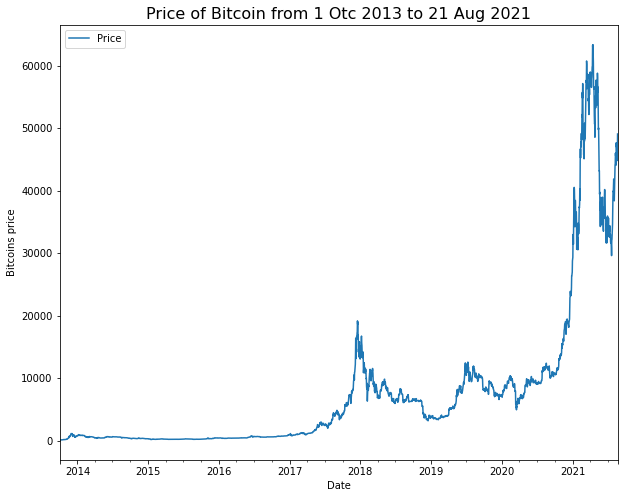

In [ ]:
# Plot our data
import matplotlib.pyplot as plt

bitcoin_prices.plot(figsize=(10,8))
plt.ylabel("Bitcoins price")
plt.title("Price of Bitcoin from 1 Otc 2013 to 21 Aug 2021", fontsize=16)
plt.show()

##### Preprocess data

In [ ]:
# get bitcoins dates and prices array
dates = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

In [ ]:
WINDOW_SIZE = 7
HORIZON = 1

In [ ]:
bitcoin_prices_ds = bitcoin_prices.copy()

for i in range(WINDOW_SIZE):
  bitcoin_prices_ds[f"Price+{i+1}"] = bitcoin_prices["Price"].shift(i+1)
bitcoin_prices_ds.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
# Make X (features) and y (labels)
X = bitcoin_prices_ds.dropna().drop(["Price"], axis=1).astype(np.float32)
y = bitcoin_prices_ds.dropna()["Price"].astype(np.float32)

# Split data in train and test set
split_size = int(0.8 * len(X))

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2300, 7), (575, 7), (2300,), (575,))

##### Build and Fit model

###### Conv1D

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

model_11 = tf.keras.Sequential([
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
  layers.Conv1D(64,
                3,
                padding="causal",
                activation="relu"),
  layers.Dense(HORIZON)
], name="model_11_timeseries_conv1d")

# Compile model
model_11.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae","mse"]
)

# Fit the model
model_11_history = model_11.fit(X_train,
                                y_train,
                                validation_data=(X_test, y_test),
                                epochs=100,
                                callbacks=[create_checkpoint_callback(model_11.name)])

Epoch 1/100
72/72 [==============================] - 1s 8ms/step - loss: 614.6157 - mae: 614.6157 - mse: 2161472.7500 - val_loss: 1242.7042 - val_mae: 1242.7042 - val_mse: 4008170.7500
Epoch 2/100
72/72 [==============================] - 0s 5ms/step - loss: 175.5749 - mae: 175.5749 - mse: 157533.1406 - val_loss: 1178.5653 - val_mae: 1178.5653 - val_mse: 3722637.2500
Epoch 3/100
72/72 [==============================] - 0s 6ms/step - loss: 168.5308 - mae: 168.5308 - mse: 147045.2656 - val_loss: 1132.5740 - val_mae: 1132.5740 - val_mse: 3436972.7500
Epoch 4/100
72/72 [==============================] - 0s 6ms/step - loss: 160.2467 - mae: 160.2467 - mse: 132323.6562 - val_loss: 1084.9133 - val_mae: 1084.9133 - val_mse: 3149296.7500
Epoch 5/100
72/72 [==============================] - 0s 5ms/step - loss: 154.1229 - mae: 154.1229 - mse: 123689.0312 - val_loss: 1053.8153 - val_mae: 1053.8153 - val_mse: 2842061.7500
Epoch 6/100
72/72 [==============================] - 0s 6ms/step - loss: 149.95

In [ ]:
model_11.evaluate(X_test, y_test)

18/18 [==============================] - 0s 4ms/step - loss: 769.8317 - mae: 769.8317 - mse: 1646260.5000


[769.8317260742188, 769.8317260742188, 1646260.5]

In [ ]:
model_11_pred = model_11.predict(X_test)
model_11_pred.shape

(575, 1, 1)

###### RNN

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

model_12 = tf.keras.Sequential([
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
  layers.LSTM(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_12_timeseries_conv1d")

# Compile model
model_12.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae","mse"]
)

# Fit the model
model_12_history = model_12.fit(X_train,
                                y_train,
                                validation_data=(X_test, y_test),
                                epochs=100,
                                callbacks=[create_checkpoint_callback(model_12.name)])

Epoch 1/100
72/72 [==============================] - 2s 13ms/step - loss: 1026.2882 - mae: 1026.2882 - mse: 4610462.5000 - val_loss: 1442.9316 - val_mae: 1442.9316 - val_mse: 5740814.0000
Epoch 2/100
72/72 [==============================] - 1s 9ms/step - loss: 203.9400 - mae: 203.9400 - mse: 209989.7188 - val_loss: 1408.9698 - val_mae: 1408.9698 - val_mse: 5072966.5000
Epoch 3/100
72/72 [==============================] - 1s 9ms/step - loss: 198.2693 - mae: 198.2693 - mse: 193740.7969 - val_loss: 1450.5195 - val_mae: 1450.5195 - val_mse: 5067226.0000
Epoch 4/100
72/72 [==============================] - 1s 9ms/step - loss: 186.2885 - mae: 186.2885 - mse: 179248.4531 - val_loss: 1305.2961 - val_mae: 1305.2961 - val_mse: 4420998.5000
Epoch 5/100
72/72 [==============================] - 1s 9ms/step - loss: 186.1210 - mae: 186.1210 - mse: 175591.8750 - val_loss: 1288.1019 - val_mae: 1288.1019 - val_mse: 4222062.5000
Epoch 6/100
72/72 [==============================] - 1s 9ms/step - loss: 185

In [ ]:
# Plot prediction

In [ ]:
model_12_pred = model_11.predict(X_test)
model_12_pred = tf.squeeze(model_12_pred)

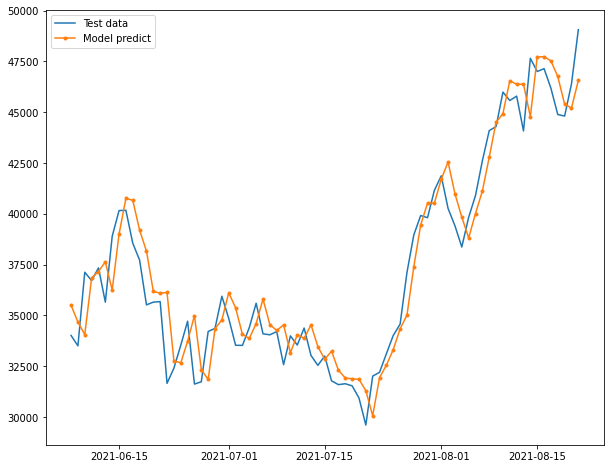

In [ ]:
plt.figure(figsize=(10,8))

offset = 500

plt.plot(dates[-len(X_test)+offset:], prices[-len(X_test)+offset:], "-", label="Test data")
plt.plot(dates[-len(X_test)+offset:], model_12_pred[offset:], ".-", label="Model predict")
plt.legend()
plt.show();
# plt.plot(dates[-offset])
# plt.plot(dates[:])